In [148]:
import numpy as np

# Sampling times
ts = np.linspace(0,24,24*6+1) # sample once every 10 minutes

# Random number generator
rng = np.random.default_rng(seed=1337)
rng_norm = lambda: rng.standard_normal(5)

In [149]:
# Generate 30 days of data
data = np.zeros((30,ts.shape[0]))
for i in range(30):
    amplitudes = rng_norm()
    wavespeed = 1/2*rng_norm()
    data[i] = np.sum(amplitudes[:,None] * np.sin(wavespeed[:,None] * ts), axis=0)

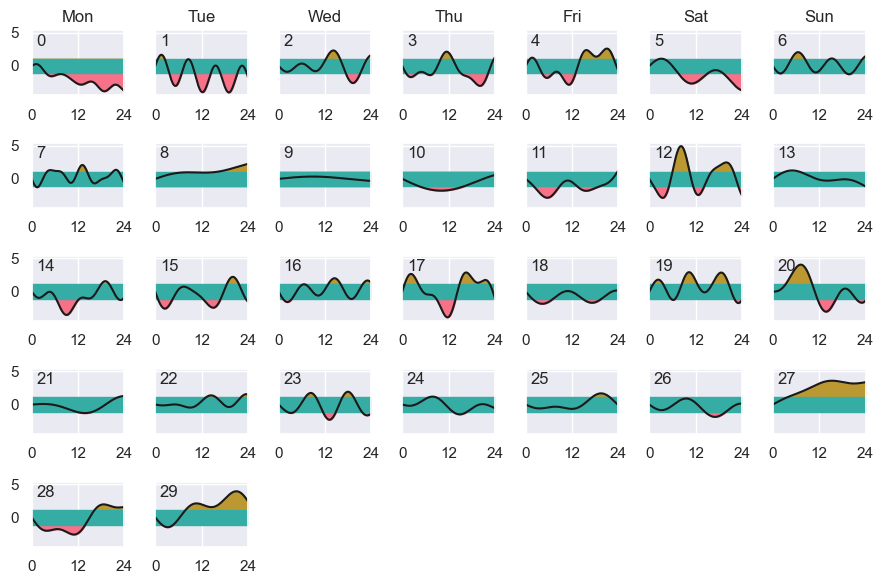

In [150]:
# Plot
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_theme('notebook')
clrs = sns.color_palette("husl")

# Get axes
fig, axs = plt.subplots(nrows=5, ncols=7, sharey=True, figsize=[9,6])

# Remove excess axes
for i in range(5):
    axs[4,2+i].set_axis_off()

# Set weekday titles
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    axs[0,i].set_title(weekdays[i])

# Limits
upper_lim = 1
lower_lim = -1
EPS = 1e-1 # Set such that limit range covers correctly

# Insert data
for i in range(30):
    row = i // 7
    col = i % 7

    # Insert day number
    axs[row, col].text(.05, .95, str(i), ha='left', va='top', transform=axs[row, col].transAxes)
    
    # Format x axis
    axs[row,col].set_xlim(0,24)
    axs[row,col].set_xticks([0,12,24])

    # Insert data
    axs[row, col].plot(ts, data[i], color = 'k')

    # Fill beyond limits
    axs[row, col].fill_between(ts, upper_lim, np.maximum(data[i],upper_lim), color = clrs[1])
    axs[row, col].fill_between(ts, lower_lim, np.minimum(data[i],lower_lim), color = clrs[0])
    
    # Fill limits
    axs[row, col].fill_between(ts, upper_lim+EPS, lower_lim-EPS, color = clrs[3])

# Get space between subplots
fig.tight_layout()

# Save plot
plt.savefig("demo.pdf", format="pdf")